In [1]:
import os
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import src.io as sio
import src.preprocessing as spp
import src.fitting as sft

In [2]:
params, data = sio.read_dat(filename="SignalAnalyzer_Spectrum001.dat", folder="Z:\\Data\\20210805_RTStageTestingTip8\\Qnami_FR03-2K14\\")

In [3]:
data.columns

Index(['Frequency (Hz)', 'Input 1 PowerSpectralDensity (V/sqrt(Hz))'], dtype='object')

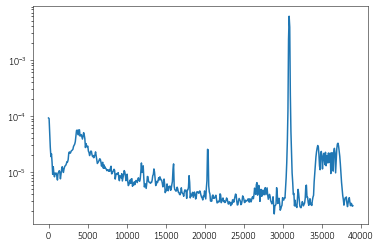

In [5]:
fig, ax = plt.subplots()
ax.plot(data['Frequency (Hz)'], data['Input 1 PowerSpectralDensity (V/sqrt(Hz))'])
ax.set_yscale("log")